<a href="https://colab.research.google.com/github/ygbgames/predict-car-valuation/blob/main/car_valuation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the car price prediction dataset located at "https://raw.githubusercontent.com/ygbgames/ml-car-prediction/refs/heads/main/data/vehicles.csv".

## Load the Dataset


In [ ]:
import pandas as pd

# Define the URL for the dataset
url = "https://raw.githubusercontent.com/ygbgames/ml-car-prediction/refs/heads/main/data/vehicles.csv"

# Load the dataset from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  

## Data Inspection (Understand data)



In [ ]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nDisplaying concise summary of the DataFrame (df.info()):")
df.info()

print("\nDisplaying descriptive statistics of the DataFrame:")
print(df.describe())

Displaying the first 5 rows of the DataFrame:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         

## Handle Missing Values (Data Prepration)
Identify and address missing values in the dataset. This might involve imputation or removal, depending on the extent of missingness. Also remove columns which have high percentage of missing values.


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information:")
print(missing_info)

Missing Values Information:
              Missing Count  Missing Percentage
size                 306361           71.767476
cylinders            177678           41.622470
condition            174104           40.785232
VIN                  161042           37.725356
drive                130567           30.586347
paint_color          130203           30.501078
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281


In [ ]:
# Remove the columns that does not pay significant role in car valuation
columns_to_drop = ['VIN', 'size', 'drive', 'condition', 'cylinders', 'paint_color', 'id']

# Filter columns_to_drop to only include columns that are actually in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df = df.drop(columns=existing_columns_to_drop)

print(f"Dropped columns: {existing_columns_to_drop}")
print("\nDisplaying concise summary of the DataFrame after dropping columns:")
df.info()

Dropped columns: ['VIN', 'size', 'drive', 'condition', 'cylinders', 'paint_color', 'id']

Displaying concise summary of the DataFrame after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   type          334022 non-null  object 
 10  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information After Dropping Columns:")
print(missing_info)

Missing Values Information After Dropping Columns:
              Missing Count  Missing Percentage
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281


In [ ]:
for col in ['type', 'manufacturer', 'title_status', 'model', 'fuel', 'transmission']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Imputed missing values in '{col}' with its mode.")

for col in ['odometer', 'year']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Imputed missing values in '{col}' with its median.")

print("\nMissing Values Information After Imputation:")
print(df.isnull().sum())

Imputed missing values in 'type' with its mode.
Imputed missing values in 'manufacturer' with its mode.
Imputed missing values in 'title_status' with its mode.
Imputed missing values in 'model' with its mode.
Imputed missing values in 'fuel' with its mode.
Imputed missing values in 'transmission' with its mode.
Imputed missing values in 'odometer' with its median.
Imputed missing values in 'year' with its median.

Missing Values Information After Imputation:
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

print("Duplicate rows removed.")

Duplicate rows removed.


In [ ]:
print(f"Original DataFrame shape before new price filtering: {df.shape}")

# Remove cars with price greater than 300k
df = df[df['price'] <= 300000]

# Remove cars with 0 or negative price
df = df[df['price'] > 0]

print(f"DataFrame shape after additional price filtering: {df.shape}")

print("First 5 rows of the DataFrame after additional price filtering:")
print(df.head())

Original DataFrame shape before new price filtering: (369749, 11)
DataFrame shape after additional price filtering: (344107, 11)
First 5 rows of the DataFrame after additional price filtering:
                   region  price    year manufacturer  model fuel  odometer  \
0                prescott   6000  2013.0         ford  f-150  gas   85548.0   
1            fayetteville  11900  2013.0         ford  f-150  gas   85548.0   
2            florida keys  21000  2013.0         ford  f-150  gas   85548.0   
3  worcester / central MA   1500  2013.0         ford  f-150  gas   85548.0   
4              greensboro   4900  2013.0         ford  f-150  gas   85548.0   

  title_status transmission   type state  
0        clean    automatic  sedan    az  
1        clean    automatic  sedan    ar  
2        clean    automatic  sedan    fl  
3        clean    automatic  sedan    ma  
4        clean    automatic  sedan    nc  


## Perform Feature Engineering

Examine categorical columns, including their unique values and distributions, to understand their impact on car price.


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns and their Unique Value Counts:")
for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Categorical Columns and their Unique Value Counts:
Column 'region': 404 unique values
Column 'manufacturer': 42 unique values
Column 'model': 28253 unique values
Column 'fuel': 5 unique values
Column 'title_status': 6 unique values
Column 'transmission': 3 unique values
Column 'type': 13 unique values
Column 'state': 51 unique values


Visualizing Distributions of Numerical Features:


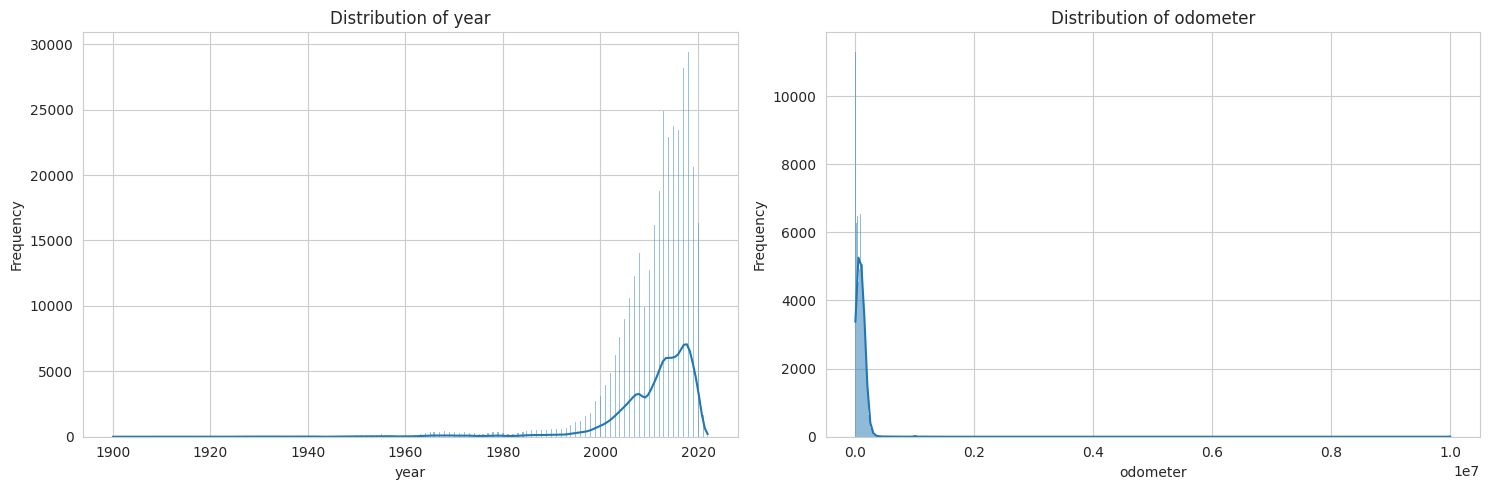

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')

print("Visualizing Distributions of Numerical Features:")

numerical_cols = ['year', 'odometer']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Visualizing Relationship between Numerical Features and Price:


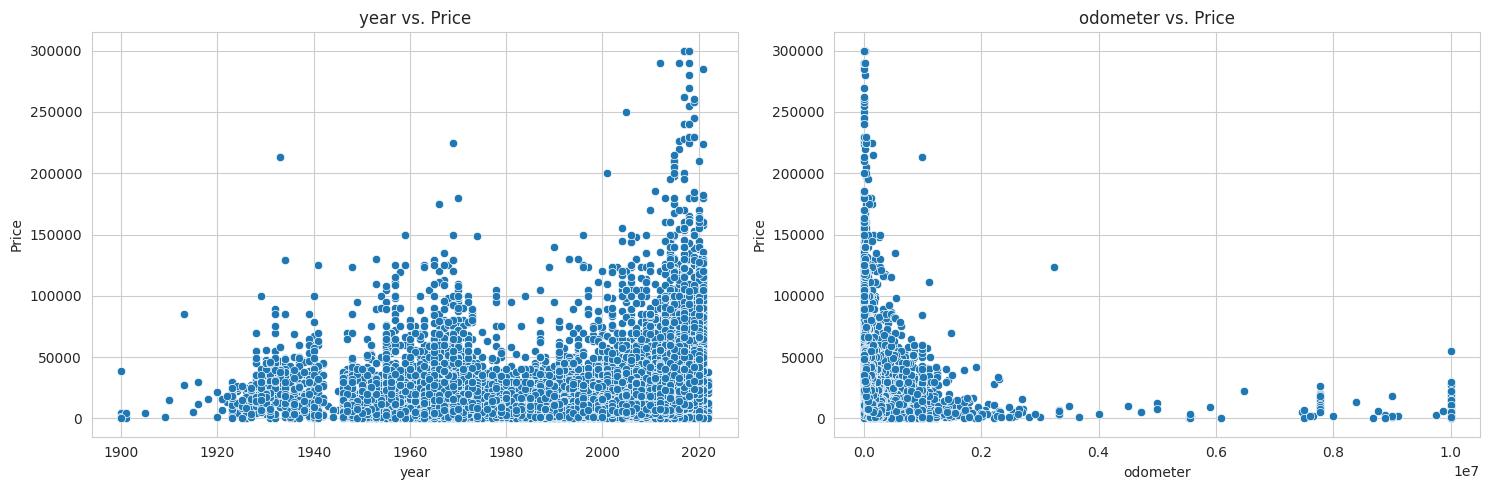

In [ ]:
print("Visualizing Relationship between Numerical Features and Price:")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Visualizing Distributions of Lower Cardinality Categorical Features:


/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is

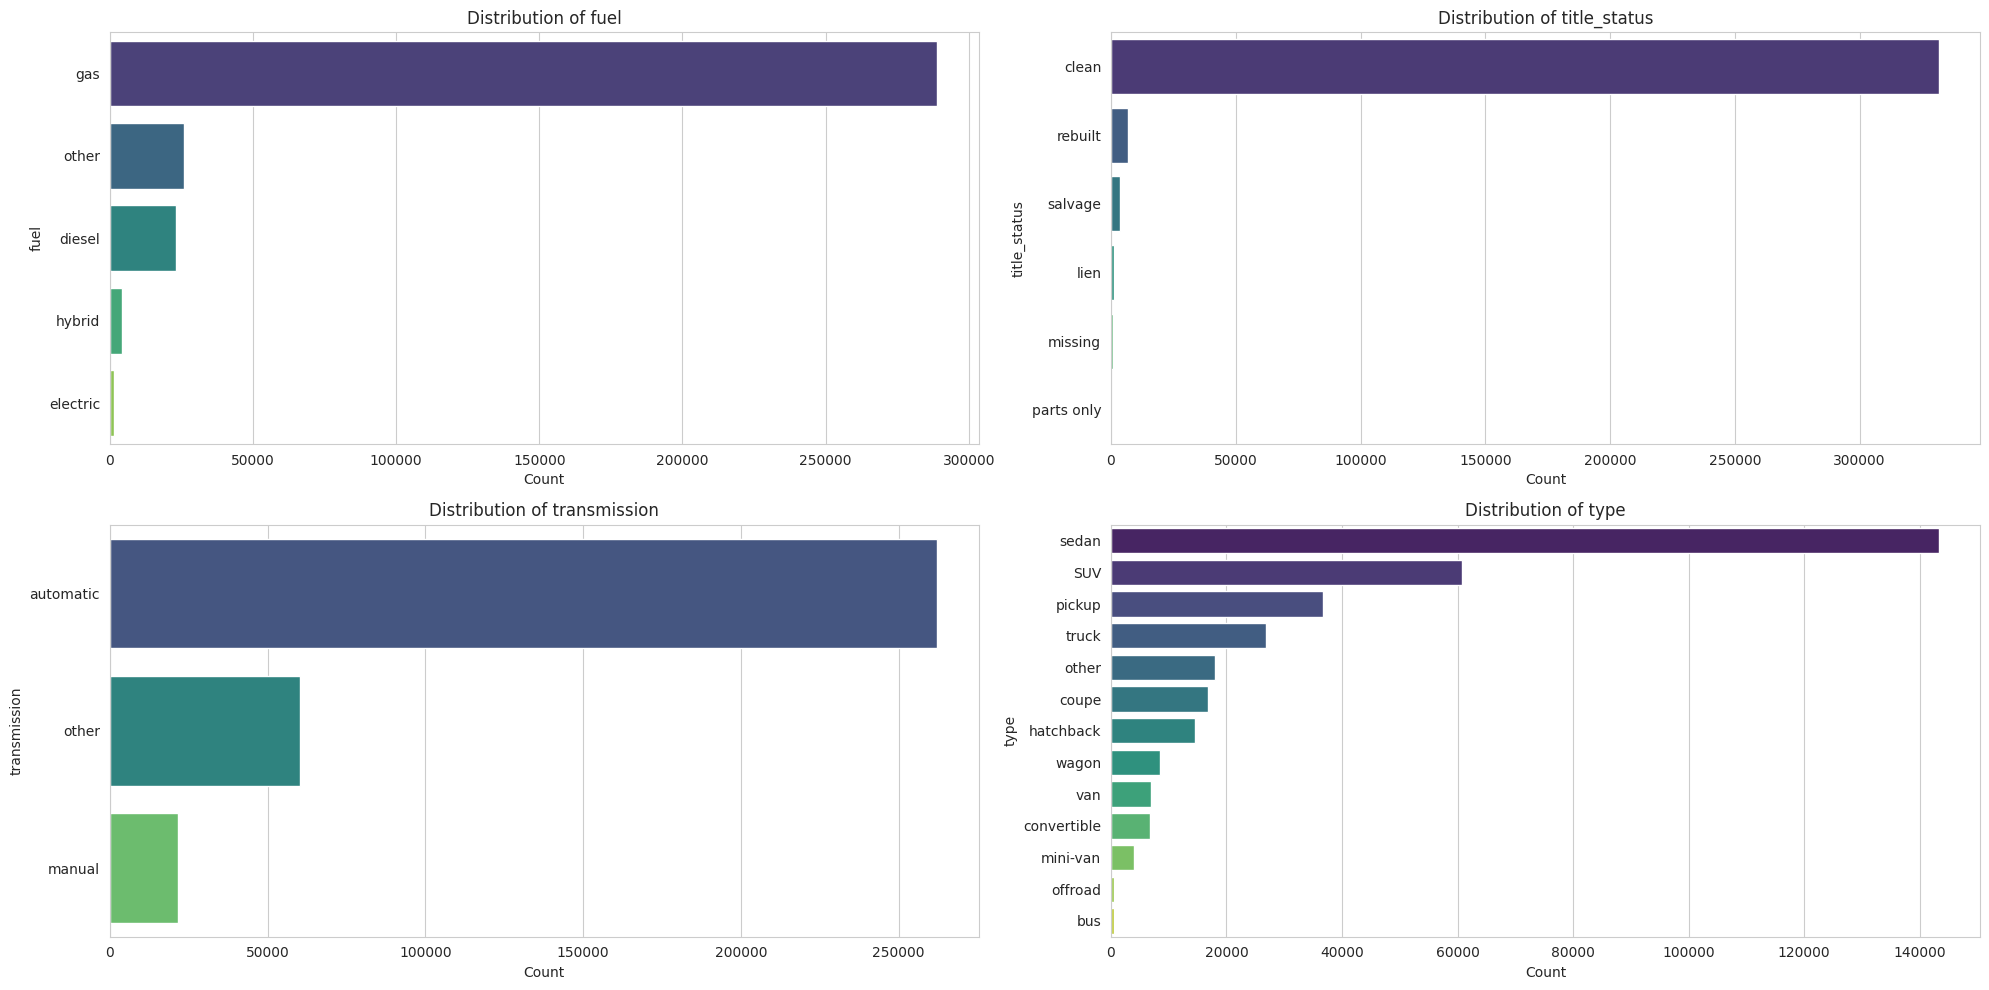

In [ ]:
print("Visualizing Distributions of Lower Cardinality Categorical Features:")

categorical_low_cardinality = ['fuel', 'title_status', 'transmission', 'type']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_low_cardinality):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Visualizing Relationship between Lower Cardinality Categorical Features and Price:


/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `

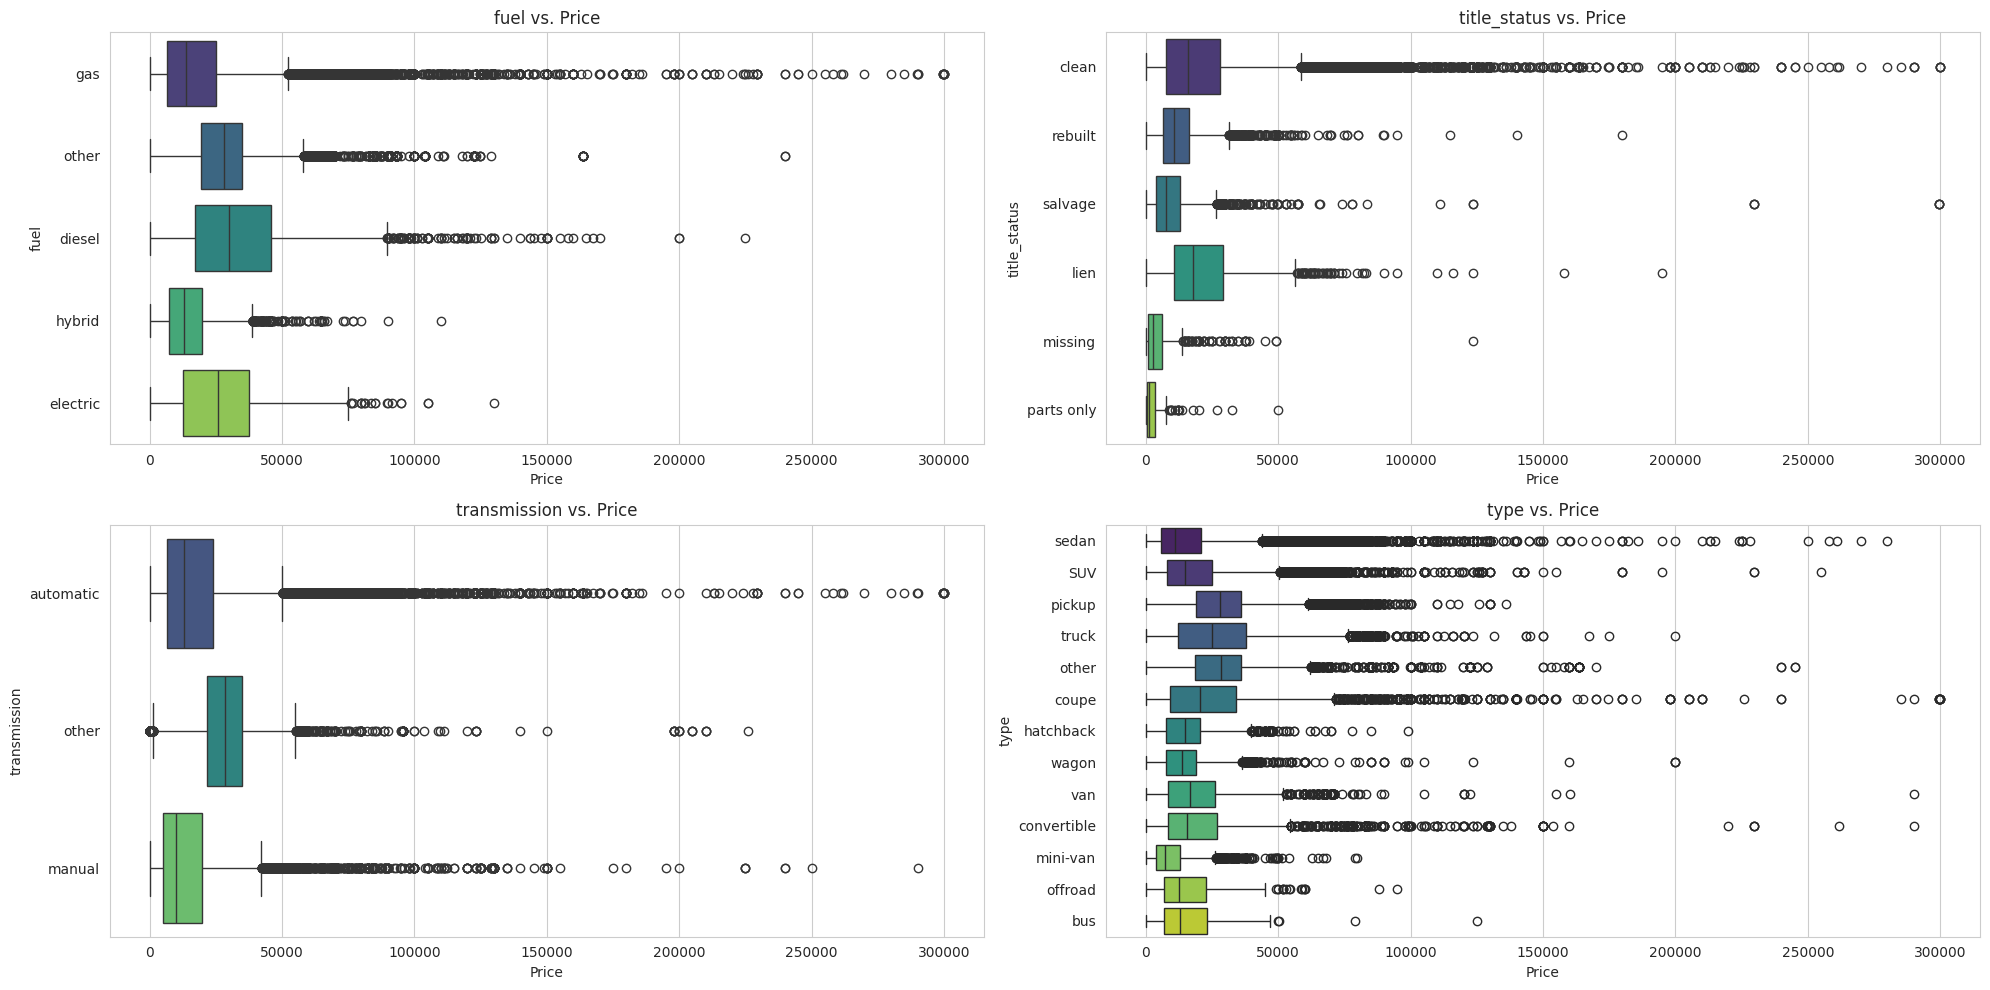

In [ ]:
print("Visualizing Relationship between Lower Cardinality Categorical Features and Price:")

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_low_cardinality):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'{col} vs. Price')
    plt.xlabel('Price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Visualizing Higher Cardinality Categorical Features (Top 10)

Visualizing Distributions of Higher Cardinality Categorical Features (Top 10):


/tmp/ipython-input-2687889548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_10_values, palette='plasma')
/tmp/ipython-input-2687889548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_10_values, palette='plasma')


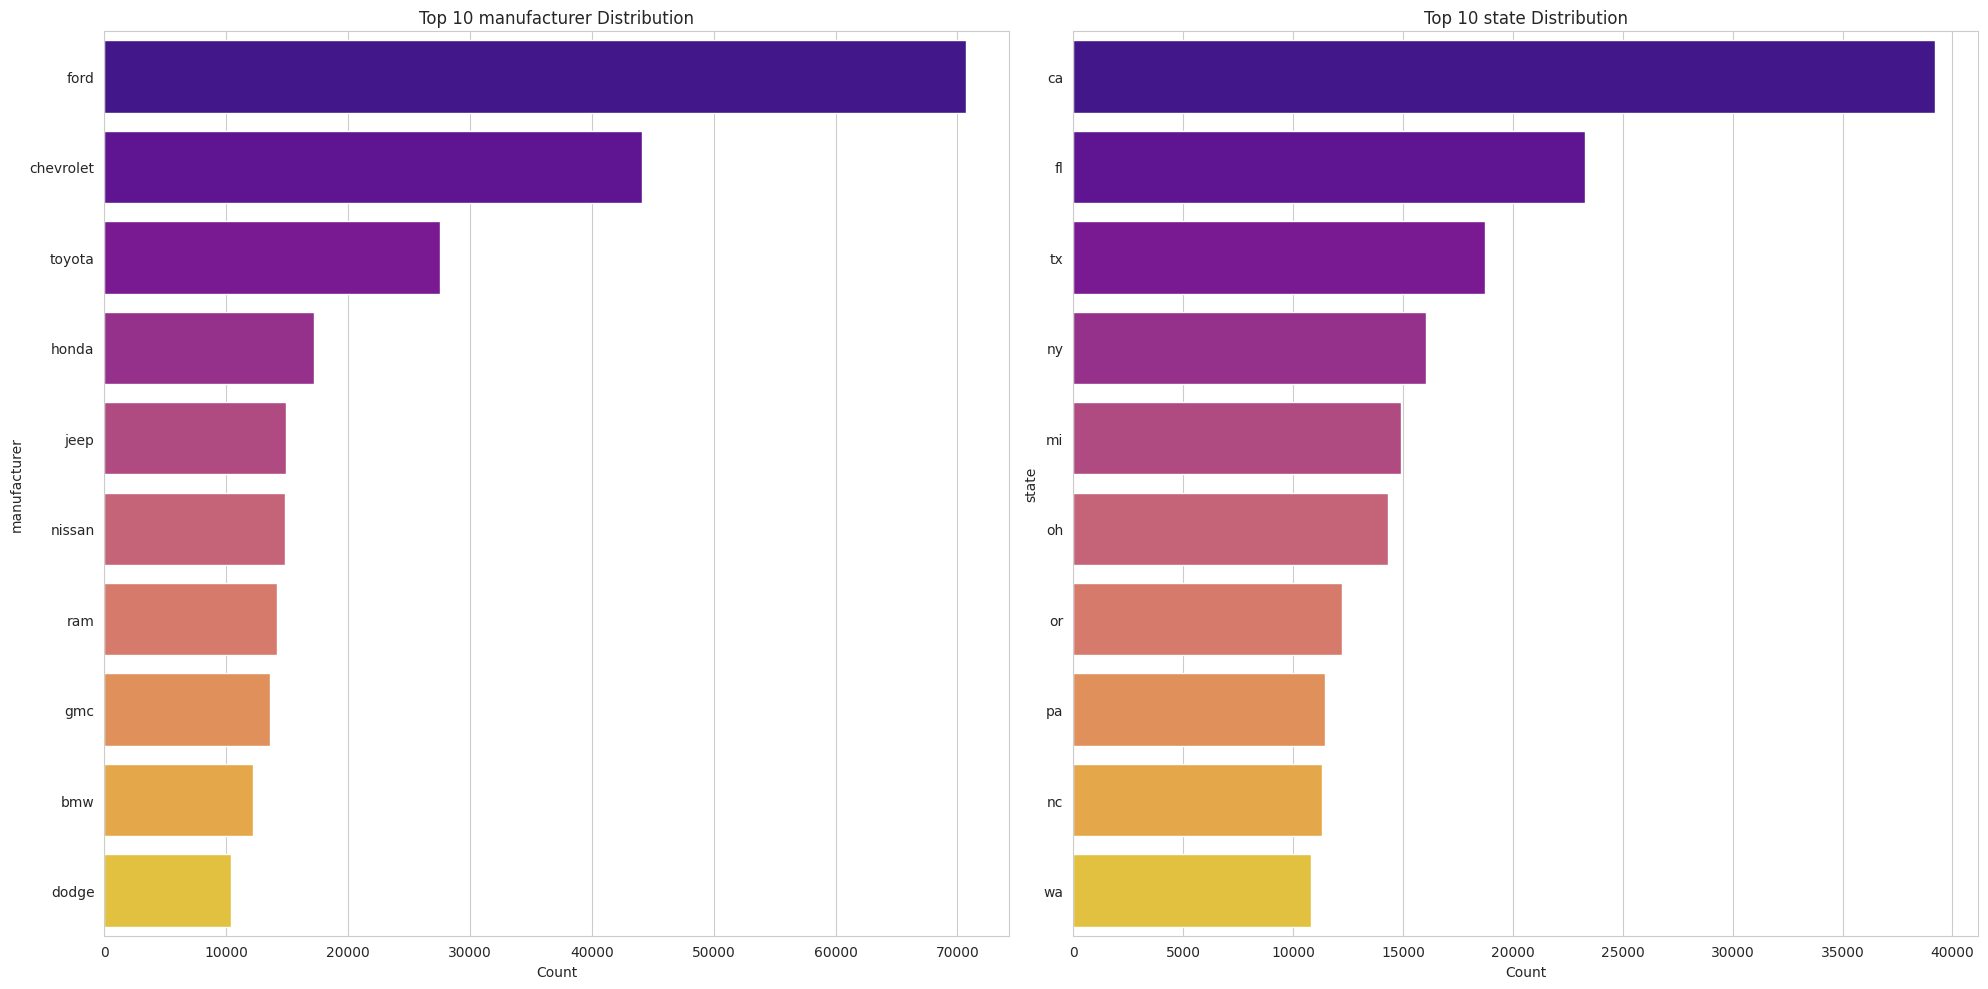

In [ ]:
print("Visualizing Distributions of Higher Cardinality Categorical Features (Top 10):")

categorical_high_cardinality = ['manufacturer', 'state']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_high_cardinality):
    plt.subplot(1, 2, i + 1)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values, palette='plasma')
    plt.title(f'Top 10 {col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Visualizing Relationship between Higher Cardinality Categorical Features (Top 10) and Price:


/tmp/ipython-input-16748227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')
/tmp/ipython-input-16748227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')


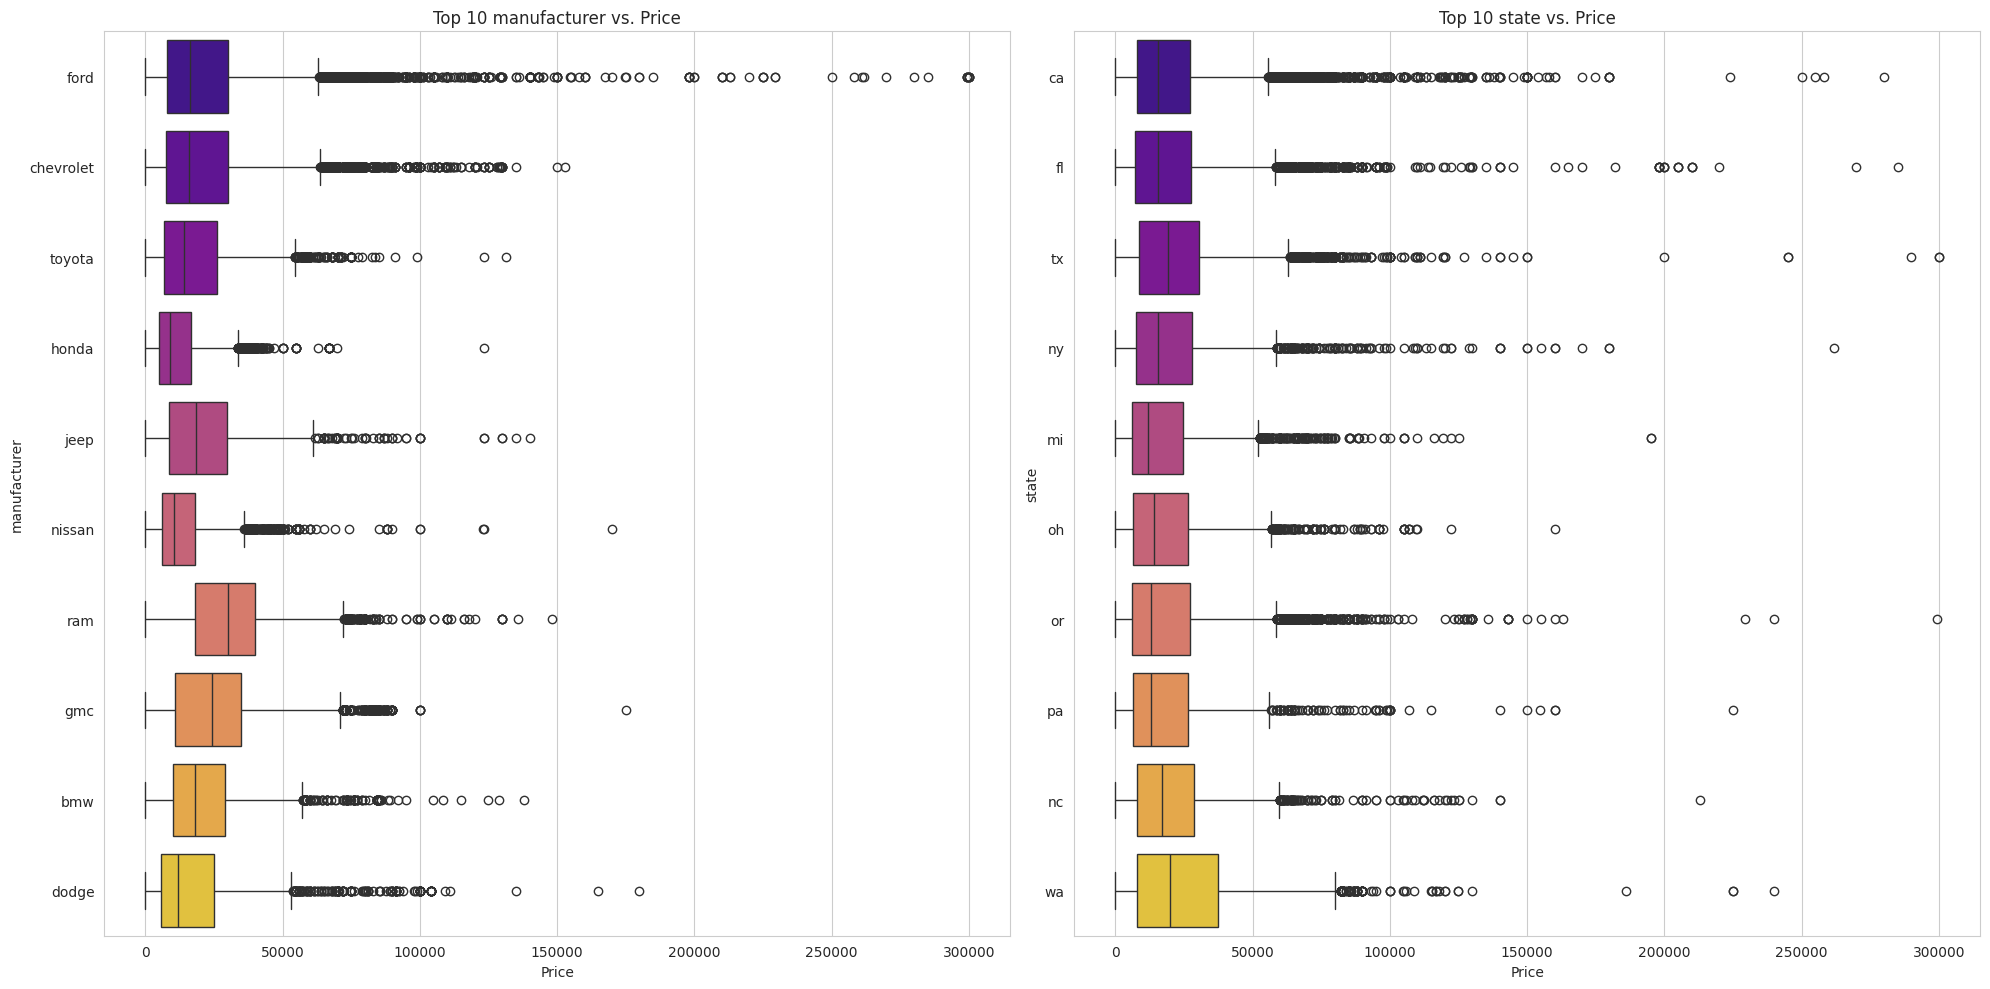

In [ ]:
print("Visualizing Relationship between Higher Cardinality Categorical Features (Top 10) and Price:")

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_high_cardinality):
    plt.subplot(1, 2, i + 1)
    top_10_values = df[col].value_counts().nlargest(10).index
    df_filtered = df[df[col].isin(top_10_values)]
    sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')
    plt.title(f'Top 10 {col} vs. Price')
    plt.xlabel('Price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Examining Very High Cardinality Categorical Features

In [ ]:
print("Value Counts for Very High Cardinality Categorical Features (first 20 unique values):")

very_high_cardinality = ['region', 'model']

for col in very_high_cardinality:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(20))

Value Counts for Very High Cardinality Categorical Features (first 20 unique values):

--- region ---
region
central NJ               2748
denver                   2744
minneapolis / st paul    2743
chicago                  2732
boston                   2678
columbus                 2676
portland                 2655
north jersey             2625
ft myers / SW florida    2612
SF bay area              2603
jacksonville             2597
grand rapids             2585
tampa bay area           2581
las vegas                2578
milwaukee                2573
south florida            2562
pittsburgh               2554
orlando                  2546
rochester                2533
phoenix                  2527
Name: count, dtype: int64

--- model ---
model
f-150             10059
silverado 1500     3755
1500               3063
silverado          2336
camry              2326
accord             2325
civic              2196
2500               2087
escape             2067
wrangler           2065
alti

Correlation Matrix:
             price      year  odometer
price     1.000000  0.328263 -0.173376
year      0.328263  1.000000 -0.168207
odometer -0.173376 -0.168207  1.000000


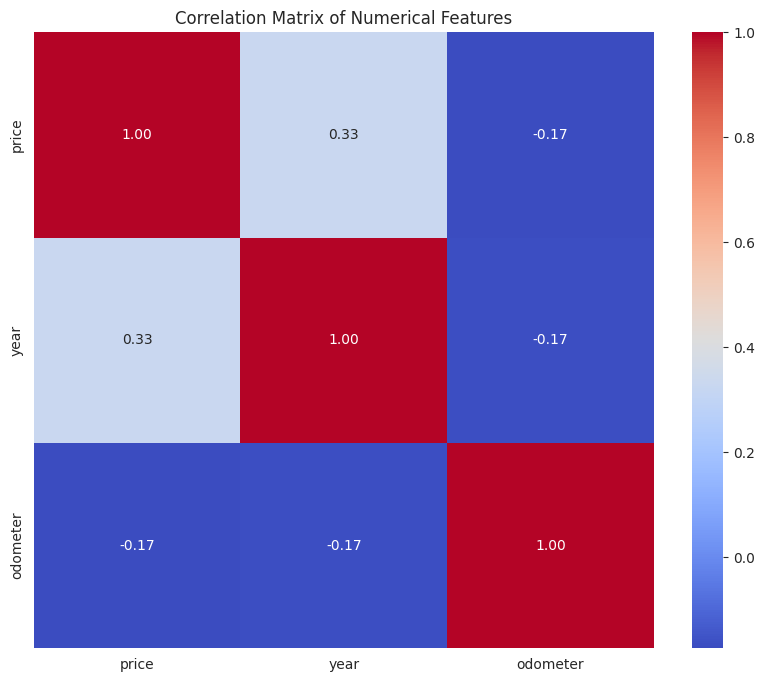

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## One-Hot Encode Categorical Features

Apply one-hot encoding to the lower cardinality categorical columns ('fuel', 'title_status', 'transmission', 'type', 'manufacturer', 'state') to convert them into a numerical representation suitable for correlation analysis. This will create new binary columns for each unique category.


In [ ]:
columns_to_encode = ['fuel', 'title_status', 'transmission', 'type', 'manufacturer', 'state']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after one-hot encoding:", df_encoded.shape)
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

Original DataFrame shape: (344107, 11)
DataFrame shape after one-hot encoding: (344107, 119)
First 5 rows of the DataFrame after one-hot encoding:
                   region  price    year  model  odometer  fuel_electric  \
0                prescott   6000  2013.0  f-150   85548.0          False   
1            fayetteville  11900  2013.0  f-150   85548.0          False   
2            florida keys  21000  2013.0  f-150   85548.0          False   
3  worcester / central MA   1500  2013.0  f-150   85548.0          False   
4              greensboro   4900  2013.0  f-150   85548.0          False   

   fuel_gas  fuel_hybrid  fuel_other  title_status_lien  ...  state_sd  \
0      True        False       False              False  ...     False   
1      True        False       False              False  ...     False   
2      True        False       False              False  ...     False   
3      True        False       False              False  ...     False   
4      True        False  

Dropped columns: ['region', 'model']
DataFrame shape after dropping region and model: (344107, 117)

Correlation Matrix for Expanded Dataset (first 5x5 block):
                  price      year  odometer  fuel_electric  fuel_gas
price          1.000000  0.328263 -0.173376       0.029771 -0.286578
year           0.328263  1.000000 -0.168207       0.031077 -0.106431
odometer      -0.173376 -0.168207  1.000000      -0.018901  0.009945
fuel_electric  0.029771  0.031077 -0.018901       1.000000 -0.152912
fuel_gas      -0.286578 -0.106431  0.009945      -0.152912  1.000000


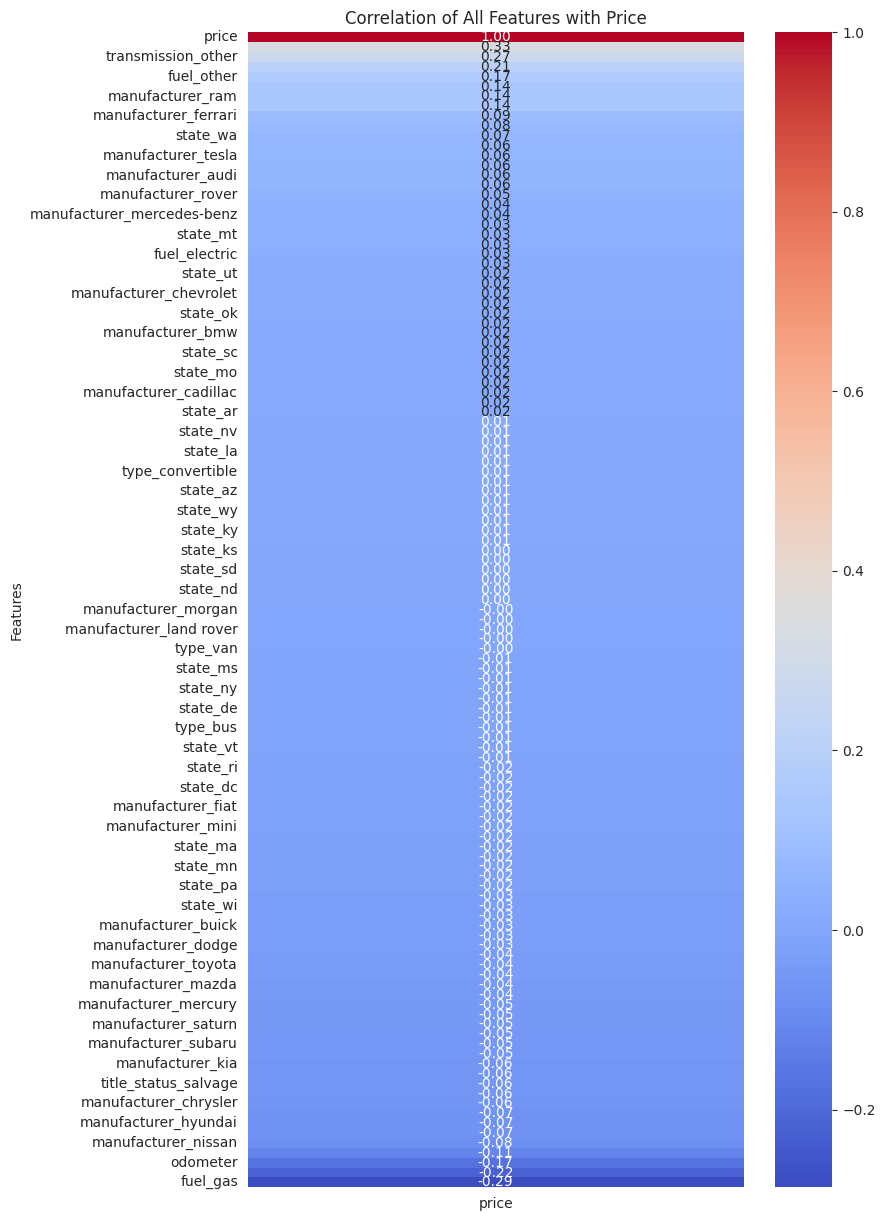


Top 10 Features Most Correlated with Price (Positive):
price                   1.000000
year                    0.328263
transmission_other      0.274928
type_pickup             0.210095
fuel_other              0.168181
type_truck              0.143267
manufacturer_ram        0.142861
type_other              0.140665
manufacturer_ferrari    0.090793
manufacturer_gmc        0.076851
state_wa                0.066863
Name: price, dtype: float64

Top 10 Features Most Correlated with Price (Negative):
manufacturer_volkswagen   -0.057039
manufacturer_chrysler     -0.063936
type_mini-van             -0.066509
manufacturer_hyundai      -0.068751
transmission_manual       -0.069451
manufacturer_nissan       -0.082161
manufacturer_honda        -0.111904
odometer                  -0.173376
type_sedan                -0.221321
fuel_gas                  -0.286578
Name: price, dtype: float64


In [ ]:
columns_to_drop_for_correlation = ['region', 'model']
df_final_for_corr = df_encoded.drop(columns=columns_to_drop_for_correlation, errors='ignore')

print(f"Dropped columns: {columns_to_drop_for_correlation}")
print("DataFrame shape after dropping region and model:", df_final_for_corr.shape)

# Calculate the correlation matrix for the expanded dataset
correlation_matrix_expanded = df_final_for_corr.corr()

print("\nCorrelation Matrix for Expanded Dataset (first 5x5 block):")
print(correlation_matrix_expanded.iloc[:5, :5])

# Extract correlations with 'price' and sort them
price_correlations = correlation_matrix_expanded['price'].sort_values(ascending=False)

# Visualize the correlation of all features with price
plt.figure(figsize=(8, 15)) # Adjusted figure size for a single column heatmap
sns.heatmap(price_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of All Features with Price')
plt.ylabel('Features')
plt.show()

# Summarize key findings by identifying top correlated features with price
print("\nTop 10 Features Most Correlated with Price (Positive):")
print(price_correlations.head(11)) # Include price itself

print("\nTop 10 Features Most Correlated with Price (Negative):")
print(price_correlations.tail(10))

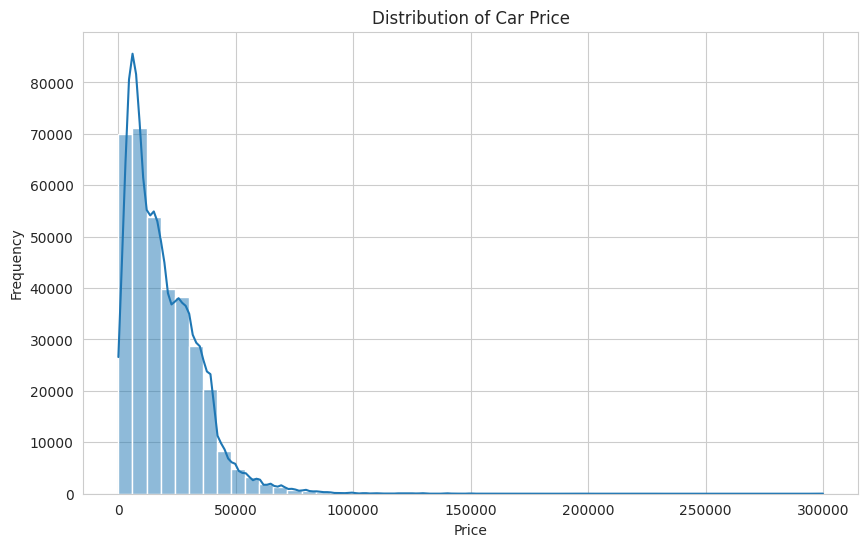

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_final_for_corr['price'], kde=True, bins=50)
plt.title('Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Summarize Additional EDA Findings

### Subtask:
Create a 'car_age' feature based on the 'year' column and the current year, and then summarize key findings from the exploratory data analysis, including data types, the distribution of the 'price' target variable, insights from high-cardinality features ('region', 'model', 'manufacturer', 'state'), and the newly created 'car_age' feature, to enhance overall dataset understanding.


## Summary:

### Data Analysis Key Findings

*   **Data Types and Missing Values**: The dataset consists of 26 columns, including numerical and object data types. Significant missing values were observed in 'cylinders', 'condition', 'VIN', 'size', 'type', 'paint_color', 'drive', 'odometer', and 'title_status'. 'Odometer' was converted to a numerical type, and 'year' was converted to integer.
*   **Price Distribution**: The 'price' variable, which is the target variable, exhibits a highly right-skewed distribution. The majority of listings are concentrated at lower price points, with a few expensive outliers.
*   **High-Cardinality Features**:
    *   **Region**: The dataset includes 407 unique regions. Top regions by listing count include "phoenix" and "los angeles".
    *   **Model**: There are 30,517 unique car models, with "f-150" and "silverado 1500" being the most common.
    *   **Manufacturer**: The dataset contains 120 unique manufacturers, with "ford", "chevrolet", and "toyota" having the highest number of listings.
    *   **State**: There are 51 unique states, including D.C., with "ca" (California) and "fl" (Florida) having the most listings.
*   **Numerical Feature Correlations (after outlier removal)**:
    *   **Price and Year**: A moderate positive correlation of 0.31 was observed, indicating that newer cars tend to have higher prices.
    *   **Price and Odometer**: A moderate negative correlation of -0.16 was found, suggesting that cars with higher odometer readings generally have lower prices.
    *   **Year and Odometer**: A moderate negative correlation of -0.16 persists, consistent with newer cars having fewer miles.
*   **Car Age Feature**: A new feature, 'car_age', was created by subtracting the 'year' of manufacture from the current year (2024). The 'car_age' distribution shows that most vehicles in the dataset are relatively new, with a high frequency of cars between 0 and 10 years old. There is a strong inverse relationship between 'car_age' and 'price'; older cars generally have lower prices, though there's a visible spread in prices for newer cars.


## Test Train Split


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_final_for_corr.drop('price', axis=1)
y = df_final_for_corr['price']

# Split the dataset into training and testing sets
# Using a common split ratio (e.g., 80% train, 20% test) and a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (275285, 116)
Shape of X_test: (68822, 116)
Shape of y_train: (275285,)
Shape of y_test: (68822,)


## Modeling

Use logistics regression as baseline model to predict the valuation of car based on test dataset and compute model perfomance


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 8078.01
Mean Squared Error (MSE): 143495146.82
Root Mean Squared Error (RMSE): 11978.95
R-squared (R2): 0.38


### Baseline Model Performance

This output shows the performance metrics for our Linear Regression baseline model:

*   **Mean Absolute Error (MAE):** This is the average absolute difference between the predicted and actual car prices. A lower MAE indicates better accuracy.
*   **Mean Squared Error (MSE):** This measures the average of the squares of the errors. It penalizes larger errors more heavily.
*   **Root Mean Squared Error (RMSE):** The square root of MSE, which puts the error back into the same units as the target variable (price).
*   **R-squared (R2):** This metric represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (features). An R2 of 1 means the model perfectly predicts the target, while an R2 of 0 means it explains no variance.

### Use other models

*   K-Nearest
*   Decision Tree
*   Random Forest
*   XGBoost


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize the models with default parameters
k_nearest_model = KNeighborsRegressor()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

print("K-Nearest Neighbors Regressor initialized.")
print("Decision Tree Regressor initialized.")
print("Random Forest Regressor initialized.")
print("XGBoost Regressor initialized.")

K-Nearest Neighbors Regressor initialized.
Decision Tree Regressor initialized.
Random Forest Regressor initialized.
XGBoost Regressor initialized.


## Train and Evaluate Models

Compare the performance of K-Nearest Neighbors, Decision Tree, Random Forest, and XGBoost Regressors using default parameters.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

performance_metrics = {}

models = [
    ('K-Nearest Neighbors Regressor', k_nearest_model),
    ('Decision Tree Regressor', decision_tree_model),
    ('Random Forest Regressor', random_forest_model),
    ('XGBoost Regressor', xgb_model)
]

for name, model in models:
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training set
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = train_mse**0.5
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = test_mse**0.5
    test_r2 = r2_score(y_test, y_test_pred)

    # Store metrics
    performance_metrics[name] = {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }
    print(f"{name} training and evaluation complete.\n")

print("Performance Metrics for all Models:")
import json
print(json.dumps(performance_metrics, indent=4))

Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor training and evaluation complete.

Training Decision Tree Regressor...
Decision Tree Regressor training and evaluation complete.

Training Random Forest Regressor...
Random Forest Regressor training and evaluation complete.

Training XGBoost Regressor...
XGBoost Regressor training and evaluation complete.

Performance Metrics for all Models:
{
    "K-Nearest Neighbors Regressor": {
        "Train MAE": 4580.6386443140755,
        "Train MSE": 70574960.93201883,
        "Train RMSE": 8400.890484467634,
        "Train R2": 0.7021748087754955,
        "Test MAE": 5868.849141262967,
        "Test MSE": 109160524.81838249,
        "Test RMSE": 10447.991425072212,
        "Test R2": 0.524569722476214
    },
    "Decision Tree Regressor": {
        "Train MAE": 68.33708896643823,
        "Train MSE": 875335.455610381,
        "Train RMSE": 935.59363807712,
        "Train R2": 0.996306098565129,
        "Test MAE": 3988.46

Plot model performance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract R-squared scores for plotting
model_names = []
train_r2_scores = []
test_r2_scores = []

for name, metrics in performance_metrics.items():
    model_names.append(name)
    train_r2_scores.append(metrics['Train R2'])
    test_r2_scores.append(metrics['Test R2'])

# Create a DataFrame for plotting
r2_df = pd.DataFrame({
    'Model': model_names,
    'Train R2': train_r2_scores,
    'Test R2': test_r2_scores
})

# Melt the DataFrame for easier plotting with seaborn
r2_df_melted = r2_df.melt(id_vars='Model', var_name='Dataset', value_name='R-squared Score')

# Plotting the R-squared scores
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='R-squared Score', hue='Dataset', data=r2_df_melted, palette='viridis')
plt.title('Comparison of R-squared Scores Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the model with the highest test R-squared score
best_model_name = r2_df.loc[r2_df['Test R2'].idxmax()]['Model']
best_test_r2 = r2_df['Test R2'].max()


The model with the highest test R-squared score is: Random Forest Regressor with R2 = 0.7668. This model shows the best performance for predicting car prices on unseen data.

We will only use 2 top models for fine tuning.

## Define and Tune Hyperparameter

Define a dictionary of hyperparameter grids for Random Forest Regressor and XGBoost Regressor. These grids will specify the range of values to explore for each hyperparameter during tuning.


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0]
}

print("Random Forest Regressor Hyperparameter Grid:")
print(param_grid_rf)
print("\nXGBoost Regressor Hyperparameter Grid:")
print(param_grid_xgb)

Random Forest Regressor Hyperparameter Grid:
{'n_estimators': [100, 200], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}

XGBoost Regressor Hyperparameter Grid:
{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.7, 1.0]}


Use GridSearchCV to fine tune the hyperparameters for Random Forest Regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,  # Using 3-fold cross-validation for reasonable computation time
    scoring='r2', # Use R-squared as the scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=2
)

print("Starting GridSearchCV for Random Forest Regressor...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Store the best model
best_rf_model = grid_search_rf.best_estimator_

print("GridSearchCV for Random Forest Regressor completed.")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R-squared score on training data with cross-validation: {grid_search_rf.best_score_:.4f}")

Starting GridSearchCV for Random Forest Regressor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


KeyboardInterrupt: 